# EDA

## 0. Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Loading

In [3]:
df = pd.read_csv('/workspace/data/raw/marketing_campaign.csv')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## 2. EDA

### 2-1. Overview

In [4]:
# データ型の確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# Null値の確認
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
# 統計量の確認
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### 2-2. Missing Values and Outliers

<Axes: xlabel='Income', ylabel='Count'>

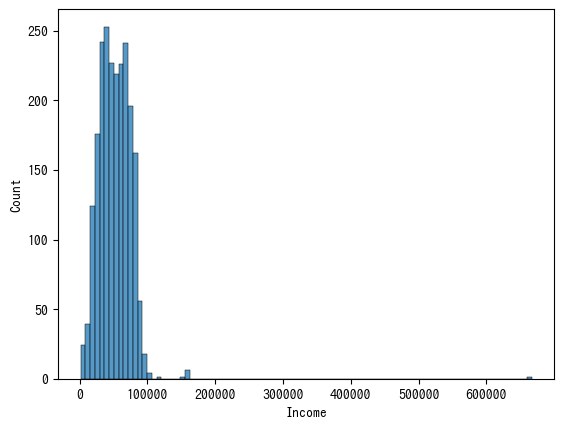

In [16]:
# Null値のあったIncomeの分布の確認
sns.histplot(data=df, x='Income')

In [7]:
# Histgramより外れ値が一件だけのように見えたため、実データの確認。
df.sort_values('Income', ascending=False).head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,1,0,0,0,0,0,0,3,11,0
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,0,0,3,11,0
1898,4619,1945,PhD,Single,113734.0,0,0,2014-05-28,9,6,...,1,0,0,0,0,0,0,3,11,0
646,4611,1970,Graduation,Together,105471.0,0,0,2013-01-21,36,1009,...,3,0,0,1,1,0,0,3,11,1


### 2-3. Target Variable Distribution

In [9]:
# 目的変数であるAcceptedCmp5の分布を把握
df['AcceptedCmp5'].value_counts(normalize=True)

AcceptedCmp5
0    0.927232
1    0.072768
Name: proportion, dtype: float64

### 2-4. Numerical Feature Exploration

<Axes: xlabel='AcceptedCmp5', ylabel='Income'>

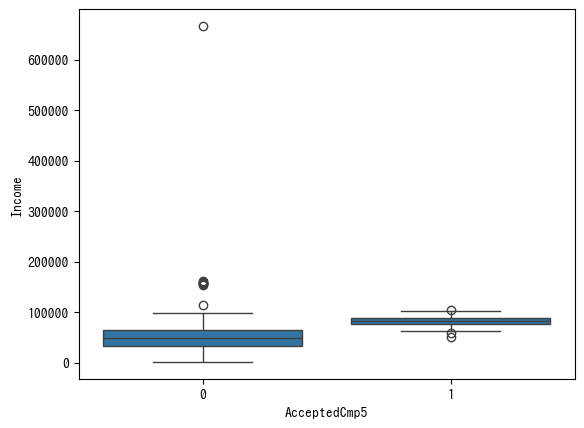

In [10]:
sns.boxplot(data=df, x='AcceptedCmp5', y='Income')

### 2-5. Categorical Feature Exploration

In [13]:
# オブジェクト型のユニークな値を見ることで、グルーピングするかを判断
cat = df.select_dtypes(exclude=np.number)
for c in cat:
    print(f'======{c}=======')
    print(df[c].unique())

======Education=======
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
======Marital_Status=======
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
======Dt_Customer=======
['2012-09-04' '2014-03-08' '2013-08-21' '2014-02-10' '2014-01-19'
 '2013-09-09' '2012-11-13' '2013-05-08' '2013-06-06' '2014-03-13'
 '2013-11-15' '2012-10-10' '2012-11-24' '2012-12-24' '2012-08-31'
 '2013-03-28' '2012-11-03' '2012-08-08' '2013-01-06' '2012-12-23'
 '2014-01-11' '2013-03-18' '2013-01-02' '2013-05-27' '2013-02-20'
 '2013-05-31' '2013-11-22' '2014-05-22' '2013-05-11' '2012-10-29'
 '2013-08-29' '2013-12-31' '2013-09-02' '2014-02-11' '2013-02-01'
 '2013-04-29' '2013-03-12' '2013-11-05' '2013-10-02' '2014-06-28'
 '2012-11-09' '2013-05-24' '2014-01-01' '2012-11-08' '2014-05-12'
 '2012-08-11' '2014-06-07' '2013-06-12' '2012-11-19' '2013-04-02'
 '2014-04-28' '2013-06-17' '2014-03-03' '2013-07-04' '2012-09-07'
 '2013-02-18' '2013-06-11' '2013-12-06' '2013-05-21' '2014-05-11'
 '2014-0

In [12]:
pd.crosstab(df['Marital_Status'], df['AcceptedCmp5'], normalize='index')

AcceptedCmp5,0,1
Marital_Status,,
Absurd,0.500000,0.500000
Alone,1.000000,0.000000
Divorced,0.943966,0.056034
Married,0.923611,0.076389
Single,0.935417,0.064583
Together,0.924138,0.075862
Widow,0.896104,0.103896
YOLO,1.000000,0.000000


In [13]:
pd.crosstab(df['Education'], df['AcceptedCmp5'], normalize='index')

AcceptedCmp5,0,1
Education,,
2n Cycle,0.950739,0.049261
Basic,1.000000,0.000000
Graduation,0.923691,0.076309
Master,0.924324,0.075676
PhD,0.919753,0.080247
